# Experiments simulation 1

## Imports

In [11]:
import os, sys, random
import polars as pl
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt  
from BigEDA.descriptive import outliers_table
from BigEDA.plots import boxplot_matrix, histogram_matrix, barplot_matrix
from FastKmedoids.plots import clustering_MDS_plot_multiple_methods

current_path = os.getcwd()
src_path = os.path.join(current_path, '..', 'src')
config_path = os.path.join(current_path, '..', 'config')
sys.path.append(src_path)
sys.path.append(config_path)
from simulations_utils import get_simulation_1
from experiments_utils import (make_experiment_1, make_experiment_3, 
                               get_pivoted_results, get_avg_results,
                               get_pivoted_results_two_iterables,
                               get_avg_results_two_iterables)
from config_experiment_1_simulation_1 import get_config as get_config_exp_1_sim_1
from config_experiment_3_simulation_1 import get_config as get_config_exp_3_sim_1


## Data Simulation

35k rows, outlier contamination

In [2]:
X, y, outliers_idx = get_simulation_1(random_state=123, return_outlier_idx=True)

In [3]:
# polars and numpy conversion
X_pl = pl.from_pandas(X)
X_np = X.to_numpy()

## Data Exploration

In [4]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,-2.651313,0.425178,-4.840969,4.436158,0,0,0,2
1,-32.573721,-26.135065,-0.516458,-1.903982,0,1,0,0
2,6.366665,2.813932,-2.505519,-7.371732,0,1,0,0
3,-5.000105,-7.485500,3.060407,4.966358,0,1,2,1
4,-4.931669,-6.980633,2.779526,-2.976350,1,1,2,2


In [5]:
# Proportion of individuals per cluster/group
unique_values, counts = np.unique(y, return_counts=True)
prop_clusters = counts/len(y)
prop_clusters = {k: v for k, v in zip(unique_values, prop_clusters)}
print(f'prop_clusters: {prop_clusters}')

prop_clusters: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


In [6]:
# Outliers information
outliers_table(X_pl, auto=False, col_names=['X1', 'X2', 'X3', 'X4'], h=1.5)

quant_variables,lower_bound,upper_bound,n_outliers,n_not_outliers,prop_outliers,prop_not_outliers
str,f64,f64,i64,i64,f64,f64
"""X1""",-17.363535,16.862265,1609,33391,0.045971,0.954029
"""X2""",-12.655664,3.936432,1774,33226,0.050686,0.949314
"""X3""",-11.847622,6.501432,43,34957,0.001229,0.998771
"""X4""",-10.074609,11.152553,519,34481,0.014829,0.985171


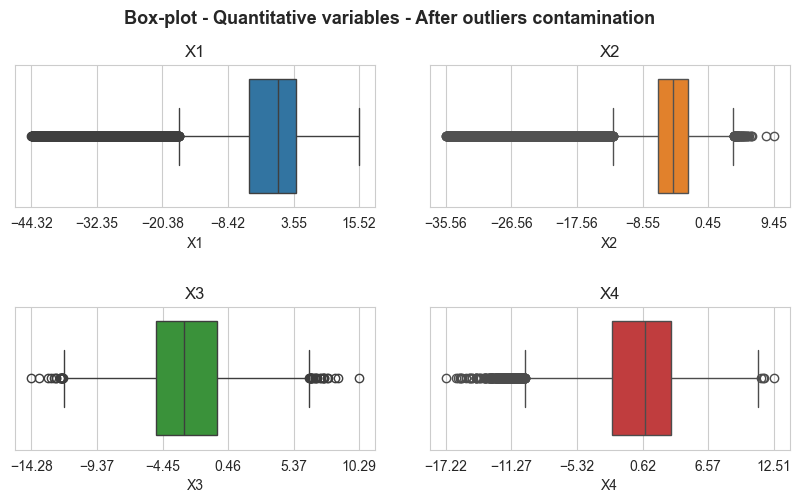

In [7]:
# Boxplot after outliers contamination
boxplot_matrix(X_pl, 
               n_cols=2, 
               title='Box-plot - Quantitative variables - After outliers contamination', 
               figsize=(10,5), 
               quant_col_names=['X1', 'X2', 'X3', 'X4'], 
               n_xticks=6, 
               title_fontsize=13, 
               save=False, 
               file_name='', 
               x_rotation=0, 
               title_height=0.99,
               style='whitegrid', 
               hspace=0.7, 
               wspace=0.15, 
               title_weight='bold',
               subtitles_fontsize=12, 
               xlabel_size=10)

In [8]:
# Boxplot before outliers contamination
'''
boxplot_matrix(X_not_outliers, 
               n_cols=2, 
               title='Box-plot - Quantitative variables - Before outliers contamination', 
               figsize=(10,5), 
               quant_col_names=['X1', 'X2', 'X3', 'X4'], 
               n_xticks=6, 
               title_fontsize=13, 
               save=False, 
               file_name='', 
               x_rotation=0, 
               title_height=0.99,
               style='whitegrid', 
               hspace=0.7, 
               wspace=0.15, 
               title_weight='bold',
               subtitles_fontsize=12, 
               xlabel_size=10)
'''

"\nboxplot_matrix(X_not_outliers, \n               n_cols=2, \n               title='Box-plot - Quantitative variables - Before outliers contamination', \n               figsize=(10,5), \n               quant_col_names=['X1', 'X2', 'X3', 'X4'], \n               n_xticks=6, \n               title_fontsize=13, \n               save=False, \n               file_name='', \n               x_rotation=0, \n               title_height=0.99,\n               style='whitegrid', \n               hspace=0.7, \n               wspace=0.15, \n               title_weight='bold',\n               subtitles_fontsize=12, \n               xlabel_size=10)\n"

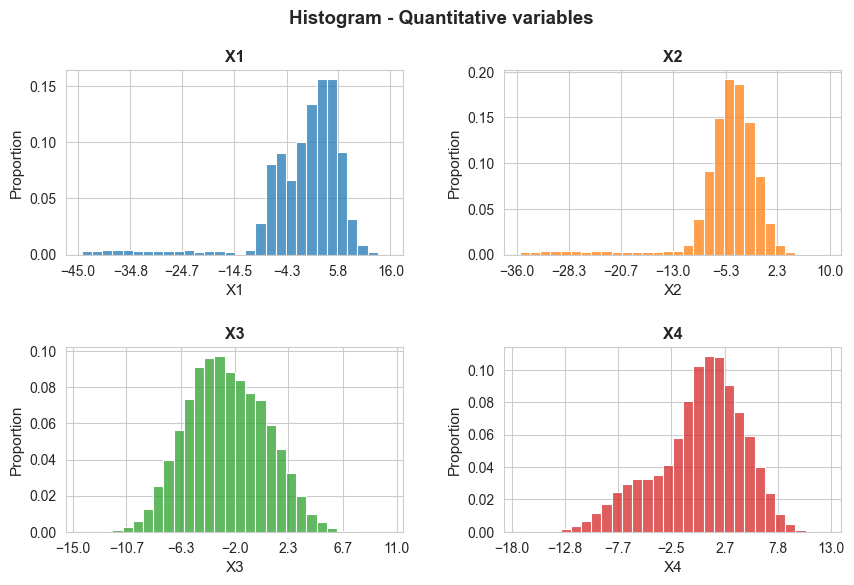

In [9]:
# Histogram
histogram_matrix(df=X_pl, bins=30, n_cols=2, title='Histogram - Quantitative variables', 
                 figsize=(10,6), quant_col_names=['X1', 'X2', 'X3', 'X4'], 
                 n_xticks=7, title_fontsize=13.5, 
                 subtitles_fontsize=11.5, save=False, file_name='', x_rotation=0, title_height=0.98,
                 style='whitegrid', hspace=0.5, wspace=0.3, n_round_xticks=1)

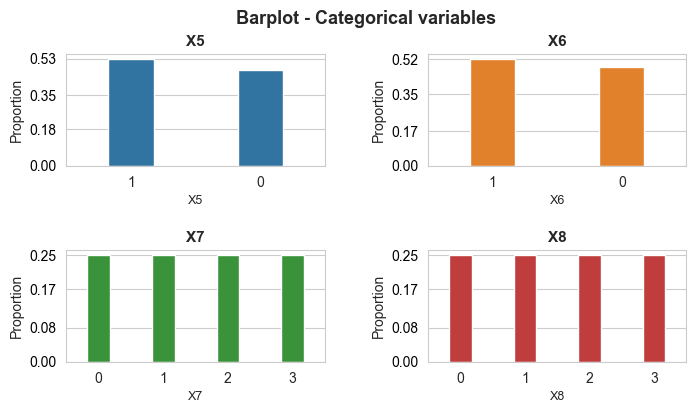

In [10]:
# Barplot
barplot_matrix(df=X_pl, n_cols=2, title='Barplot - Categorical variables', 
                 figsize=(8,4), cat_col_names=['X5', 'X6', 'X7', 'X8'], 
                 title_fontsize=13, subtitles_fontsize=11, 
                 save=False, file_name='', x_rotation=0, title_height=0.99,
                 style='whitegrid', hspace=0.75, wspace=0.4, title_weight='bold', bar_width=0.35,
                 ylabel_size=10, xlabel_size=9, xticks_size=10)

In [11]:
# Correlation Matrix
X.corr()

,X1,X2,X3,X4,X5,X6,X7,X8
X1,1.000000,0.791927,-0.284546,-0.167647,-0.131256,-0.141723,-0.101447,-0.060432
X2,0.791927,1.000000,-0.117777,0.051606,-0.164003,-0.172118,-0.143371,0.054163
X3,-0.284546,-0.117777,1.000000,-0.044339,0.011143,0.405006,-0.120270,-0.149596
X4,-0.167647,0.051606,-0.044339,1.000000,0.199533,-0.468693,0.353659,0.534326
X5,-0.131256,-0.164003,0.011143,0.199533,1.000000,0.066579,0.736487,0.172924
X6,-0.141723,-0.172118,0.405006,-0.468693,0.066579,1.000000,-0.106847,-0.445852
X7,-0.101447,-0.143371,-0.120270,0.353659,0.736487,-0.106847,1.000000,0.320869
X8,-0.060432,0.054163,-0.149596,0.534326,0.172924,-0.445852,0.320869,1.000000


In [12]:
# Correlation Analysis
corr_matrix = X.corr().to_numpy()
n_corr = len(corr_matrix[np.triu_indices_from(corr_matrix, k=1)])
n_corr_below_30 = np.sum(np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) < 0.30)
n_corr_above_60 = np.sum(np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) > 0.60)
n_corr_between = np.sum((np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) >= 0.30) & (np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) <= 0.60))
                        
print('Proportion of pair-wise correlation > 0.60 (in abs. value): ', np.round(n_corr_above_60 / n_corr, 2))
print('Proportion of pair-wise correlations in [0.30, 0.60]: ', np.round(n_corr_between / n_corr, 2))
print('Proportion of pair-wise correlation < 0.30 (in abs. value): ', np.round(n_corr_below_30 / n_corr, 2))

Proportion of pair-wise correlation > 0.60 (in abs. value):  0.07
Proportion of pair-wise correlations in [0.30, 0.60]:  0.21
Proportion of pair-wise correlation < 0.30 (in abs. value):  0.71


## Experiment 1: Accuracy and computation time for Fast k-medoids (section 3.2)

In [7]:
n_realizations = 2
experiment_random_state = 123 
random.seed(experiment_random_state)
random_state_list = random.sample(range(n_realizations*1000), n_realizations)

In [14]:
results = {}
experiment_1_config = get_config()

for random_state in tqdm(random_state_list):
        
    results[random_state] = make_experiment_1(**experiment_1_config,
                                              X=X, 
                                              y=y,
                                              random_state=random_state)

  0%|          | 0/2 [00:00<?, ?it/s]

frac_size: 0.0005
frac_size: 0.1


 50%|█████     | 1/2 [00:45<00:45, 45.60s/it]

frac_size: 0.0005
frac_size: 0.1


100%|██████████| 2/2 [01:28<00:00, 44.42s/it]


In [15]:
results

{107: {'time': {0.0005: 22.660033464431763, 0.1: 22.75893759727478},
  'adj_accuracy': {0.0005: 0.8735428571428572, 0.1: 0.8775714285714286}},
 548: {'time': {0.0005: 20.44965100288391, 0.1: 22.558764219284058},
  'adj_accuracy': {0.0005: 0.8202571428571429, 0.1: 0.8808857142857143}}}

**TO DO: save results as pkl**

In [16]:
pivoted_results = get_pivoted_results(
    results=results, 
    iterable=experiment_1_config['frac_sample_sizes']
)

pivoted_results

{'time': {0.0005: [22.660033464431763, 20.44965100288391],
  0.1: [22.75893759727478, 22.558764219284058]},
 'adj_accuracy': {0.0005: [0.8735428571428572, 0.8202571428571429],
  0.1: [0.8775714285714286, 0.8808857142857143]}}

In [17]:
avg_results = get_avg_results(
    results=results, 
    pivoted_results=pivoted_results, 
    iterable=experiment_1_config['frac_sample_sizes']
)

avg_results

{'time': {0.0005: 21.554842233657837, 0.1: 22.65885090827942},
 'adj_accuracy': {0.0005: 0.8469, 0.1: 0.8792285714285715}}

In [21]:
list(avg_results['adj_accuracy'].values())

[0.8469, 0.8792285714285715]

In [ ]:
frac_sample_sizes_list = list(avg_results['adj_accuracy'].keys())
adj_accuracy_list = list(avg_results['adj_accuracy'].values())
time_list = list(avg_results['time'].values())
best_frac_sample_size = frac_sample_sizes_list[np.argmax(adj_accuracy_list)]

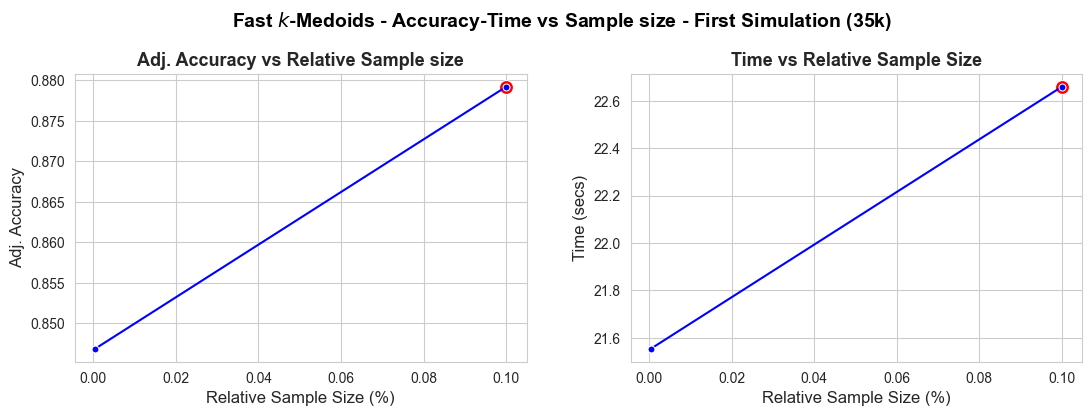

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(13,4))
axes = axes.flatten()  

sns.lineplot(x=[best_frac_sample_size], y=[avg_results['adj_accuracy'][best_frac_sample_size]], color='red', marker='o',  markersize=10, ax=axes[0])
sns.lineplot(
    x=frac_sample_sizes_list,
    y=adj_accuracy_list, 
    color='blue', marker='o',  markersize=5, ax=axes[0]
)

sns.lineplot(x=[best_frac_sample_size], y=[avg_results['time'][best_frac_sample_size]], color='red', marker='o', markersize=10, ax=axes[1])
sns.lineplot(
    x=frac_sample_sizes_list,
    y=time_list, 
    color='blue', marker='o', markersize=5, ax=axes[1]
)

axes[0].set_title('Adj. Accuracy vs Relative Sample size', size=13, weight='bold')
axes[0].set_ylabel('Adj. Accuracy', size=12)
#axes[0].set_yticks(np.round(np.linspace(np.min(best_accuracy_values), np.max(best_accuracy_values), 7),3))

axes[1].set_title('Time vs Relative Sample Size', size=13, weight='bold')
axes[1].set_ylabel('Time (secs)', size=12)
#axes[1].set_yticks(np.round(np.linspace(np.min(times_values), np.max(times_values), 7),1))

for i in range(len(axes)):
    #axes[i].set_xticks(np.round(np.linspace(np.min(data_perc_sizes), np.max(data_perc_sizes), 7),1))
    axes[i].set_xlabel('Relative Sample Size (%)', size=12)


#plt.tight_layout()
plt.subplots_adjust(top=0.83)
plt.suptitle('Fast $k$-Medoids - Accuracy-Time vs Sample size - First Simulation (35k)', fontsize=14, y=0.99, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=0.5, wspace=0.23) 

file_name = 'plots/kmedoids_simulation_1_acc_time_v2'
#fig.savefig(file_name + '.png', format='png', dpi=200)

plt.show()

**TO DO: save plot as png**

**TO DO: repetir experimento 1 con más valores para el iterable, por ahora se usó un set de prueba**


## Experiment 3: Accuracy, computation time and number of folds for q-Fold Fast k-medoids (section 3.4)

In [6]:
n_realizations = 2
experiment_random_state = 123 
random.seed(experiment_random_state)
random_state_list = random.sample(range(n_realizations*1000), n_realizations)

In [7]:
results = {}
experiment_3_config = get_config_exp_3_sim_1()

for random_state in tqdm(random_state_list):
        
    results[random_state] = make_experiment_3(**experiment_3_config,
                                              X=X_np, 
                                              y=y,
                                              random_state=random_state)

  0%|          | 0/2 [00:00<?, ?it/s]

n_splits: 5
frac_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:28<00:00,  5.60s/it]


frac_size: 0.3


Clustering Folds: 100%|██████████| 5/5 [00:31<00:00,  6.22s/it]


n_splits: 20
frac_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:34<00:00,  1.70s/it]


frac_size: 0.3


 50%|█████     | 1/2 [02:03<02:03, 123.02s/it]

n_splits: 5
frac_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:28<00:00,  5.79s/it]


frac_size: 0.3


Clustering Folds: 100%|██████████| 5/5 [00:33<00:00,  6.63s/it]


n_splits: 20
frac_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:34<00:00,  1.71s/it]


frac_size: 0.3


100%|██████████| 2/2 [04:08<00:00, 124.26s/it]


In [9]:
results

{107: {'time': {5: {0.05: 28.301459312438965, 0.3: 31.3735990524292},
   20: {0.05: 34.636727809906006, 0.3: 28.335503339767456}},
  'adj_accuracy': {5: {0.05: 0.7996571428571428, 0.3: 0.8761142857142857},
   20: {0.05: 0.8806285714285714, 0.3: 0.8796857142857143}}},
 548: {'time': {5: {0.05: 29.246606826782227, 0.3: 33.45615839958191},
   20: {0.05: 34.41771173477173, 0.3: 28.029916286468506}},
  'adj_accuracy': {5: {0.05: 0.8767714285714285, 0.3: 0.8796857142857143},
   20: {0.05: 0.8746285714285714, 0.3: 0.8756857142857143}}}}

In [12]:
pivoted_results = get_pivoted_results_two_iterables(results = results, 
                                  iterable1 = experiment_3_config['n_splits'], 
                                  iterable2 = experiment_3_config['frac_sample_sizes'])

pivoted_results

{'time': {5: {0.05: [28.301459312438965, 29.246606826782227],
   0.3: [31.3735990524292, 33.45615839958191]},
  20: {0.05: [34.636727809906006, 34.41771173477173],
   0.3: [28.335503339767456, 28.029916286468506]}},
 'adj_accuracy': {5: {0.05: [0.7996571428571428, 0.8767714285714285],
   0.3: [0.8761142857142857, 0.8796857142857143]},
  20: {0.05: [0.8806285714285714, 0.8746285714285714],
   0.3: [0.8796857142857143, 0.8756857142857143]}}}

In [13]:
avg_results = get_avg_results_two_iterables(results = results, 
                                  pivoted_results = pivoted_results, 
                                   iterable1 = experiment_3_config['n_splits'], 
                                  iterable2 = experiment_3_config['frac_sample_sizes'])

avg_results

{'time': {5: {0.05: 28.774033069610596, 0.3: 32.414878726005554},
  20: {0.05: 34.52721977233887, 0.3: 28.18270981311798}},
 'adj_accuracy': {5: {0.05: 0.8382142857142857, 0.3: 0.8779},
  20: {0.05: 0.8776285714285714, 0.3: 0.8776857142857143}}}

In [18]:
import pandas as pd

def avg_results_to_dfs(avg_results):
    dfs = {}
    for key, subdict in avg_results.items():
        rows = [(k1, k2, v) for k1, inner in subdict.items() for k2, v in inner.items()]
        dfs[key] = pd.DataFrame(rows, columns=['n_splits', 'frac_sample_sizes', key])
    return dfs


In [19]:
dfs = avg_results_to_dfs(avg_results)

In [20]:
dfs['adj_accuracy']

,n_splits,frac_sample_sizes,adj_accuracy
0,5,0.05,0.838214
1,5,0.30,0.877900
2,20,0.05,0.877629
3,20,0.30,0.877686


In [21]:
dfs['time']

,n_splits,frac_sample_sizes,time
0,5,0.05,28.774033
1,5,0.30,32.414879
2,20,0.05,34.527220
3,20,0.30,28.182710


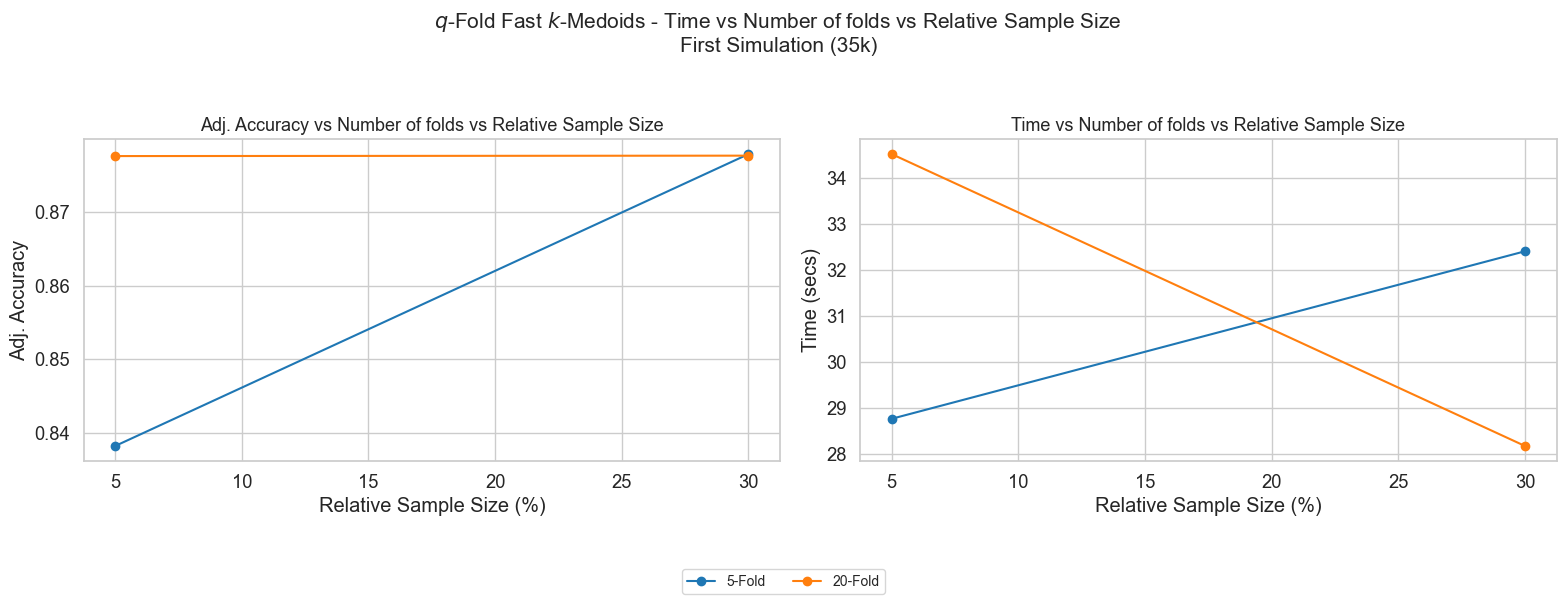

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Primer subplot: Accuracy
ax1 = axes[0]
for k1 in sorted(dfs['adj_accuracy']['n_splits'].unique()):
    subset = dfs['adj_accuracy'][dfs['adj_accuracy']['n_splits'] == k1]
    ax1.plot(subset['frac_sample_sizes'] * 100, subset['adj_accuracy'], marker='o', label=f"{k1}-Fold")
ax1.set_title("Adj. Accuracy vs Number of folds vs Relative Sample Size", fontsize=13)
ax1.set_xlabel("Relative Sample Size (%)")
ax1.set_ylabel("Adj. Accuracy")

# Segundo subplot: Time
ax2 = axes[1]
for k1 in sorted(dfs['time']['n_splits'].unique()):
    subset = dfs['time'][dfs['time']['n_splits'] == k1]
    ax2.plot(subset['frac_sample_sizes'] * 100, subset['time'], marker='o', label=f"{k1}-Fold")
ax2.set_title("Time vs Number of folds vs Relative Sample Size", fontsize=13)
ax2.set_xlabel("Relative Sample Size (%)")
ax2.set_ylabel("Time (secs)")

# Título general
fig.suptitle("$q$-Fold Fast $k$-Medoids - Time vs Number of folds vs Relative Sample Size\nFirst Simulation (35k)", fontsize=15)

# Leyenda común abajo
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(labels), fontsize=10)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()


## Experiment 4: Empirical comparison to other existing algorithms (section 3.5)